In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [8]:
df=pd.read_csv('Bias_correction_ucl.csv')

In [9]:
df.head(5)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0  2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0  2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0  2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0  2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [10]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [11]:
df.shape

(7752, 25)

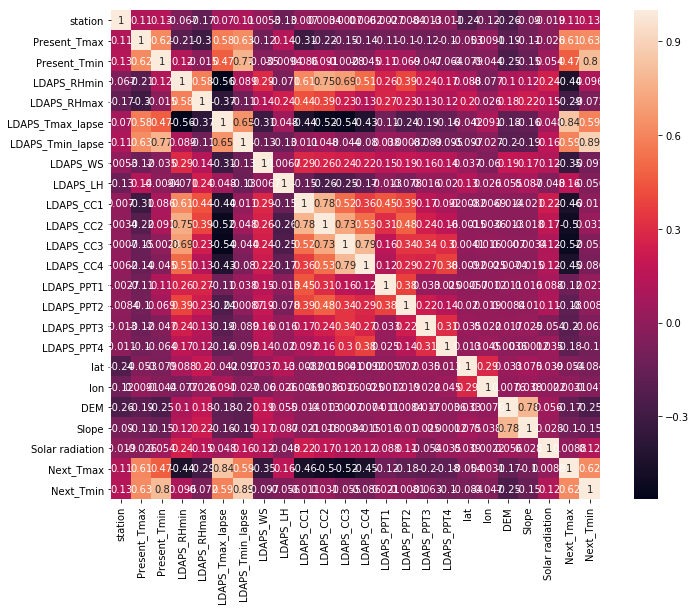

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True,square=True)

In [13]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [14]:
df=df.dropna()

AxesSubplot(0.125,0.125;0.775x0.755)


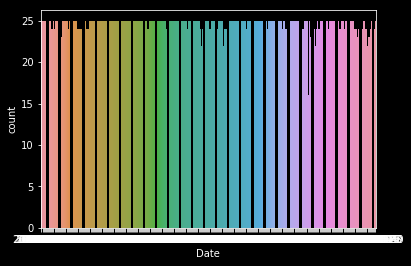

In [71]:
print(sns.countplot(df['Date']))

In [72]:
df['Date']=pd.to_numeric(df['Date'],errors='coerce')

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: -0.257069
Kurtosis: -0.424122


(None, None, None)

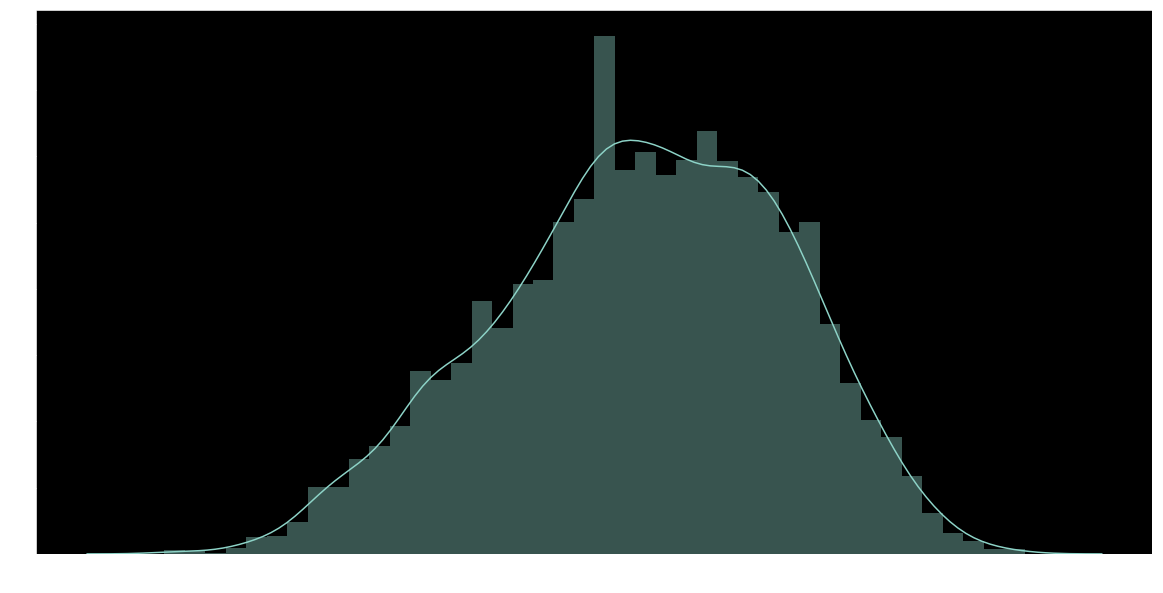

In [9]:
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
print(sns.distplot(df['Present_Tmax'])),print("Skewness: %f" % df['Present_Tmax'].skew()),print("Kurtosis: %f" % df['Present_Tmax'].kurt())

AxesSubplot(0.125,0.125;0.775x0.755)


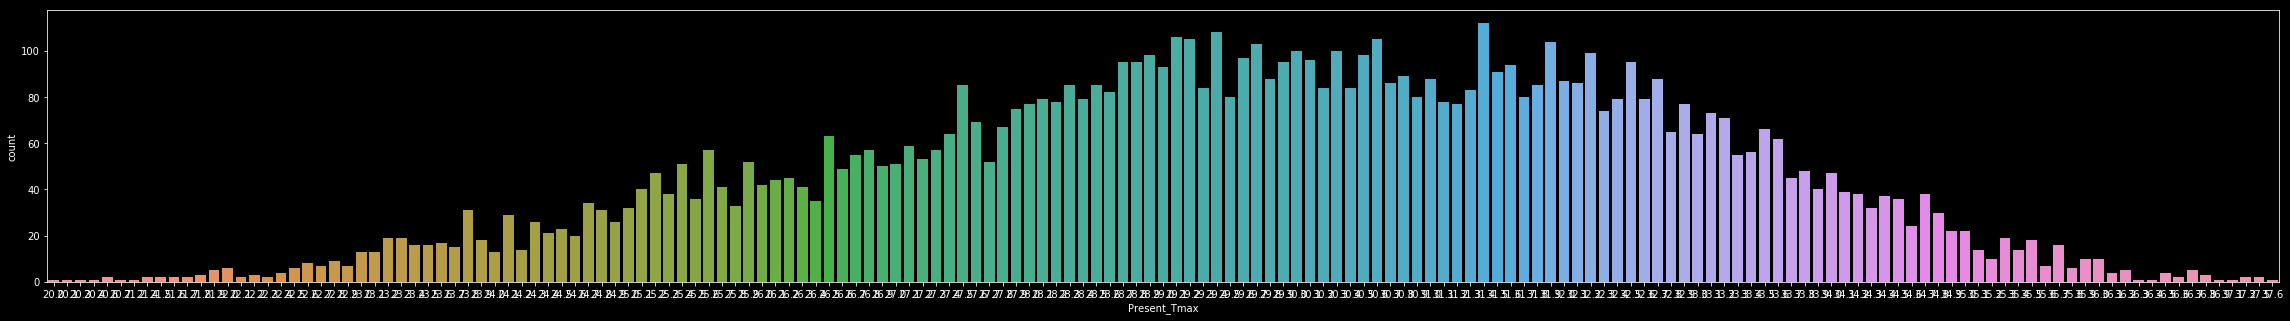

In [10]:
plt.figure(figsize=(40,5))
plt.style.use('dark_background')
print(sns.countplot(df['Present_Tmax']))

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: -0.353822
Kurtosis: 0.151177


(None, None, None)

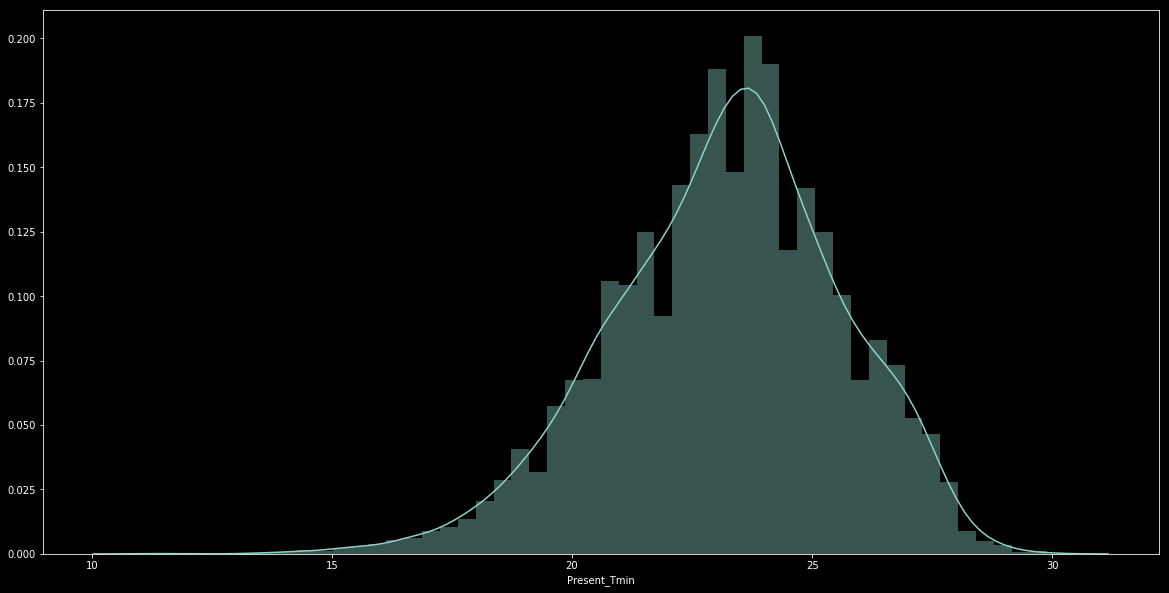

In [11]:
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
print(sns.distplot(df['Present_Tmin'])),print("Skewness: %f" % df['Present_Tmin'].skew()),print("Kurtosis: %f" % df['Present_Tmin'].kurt())

In [12]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


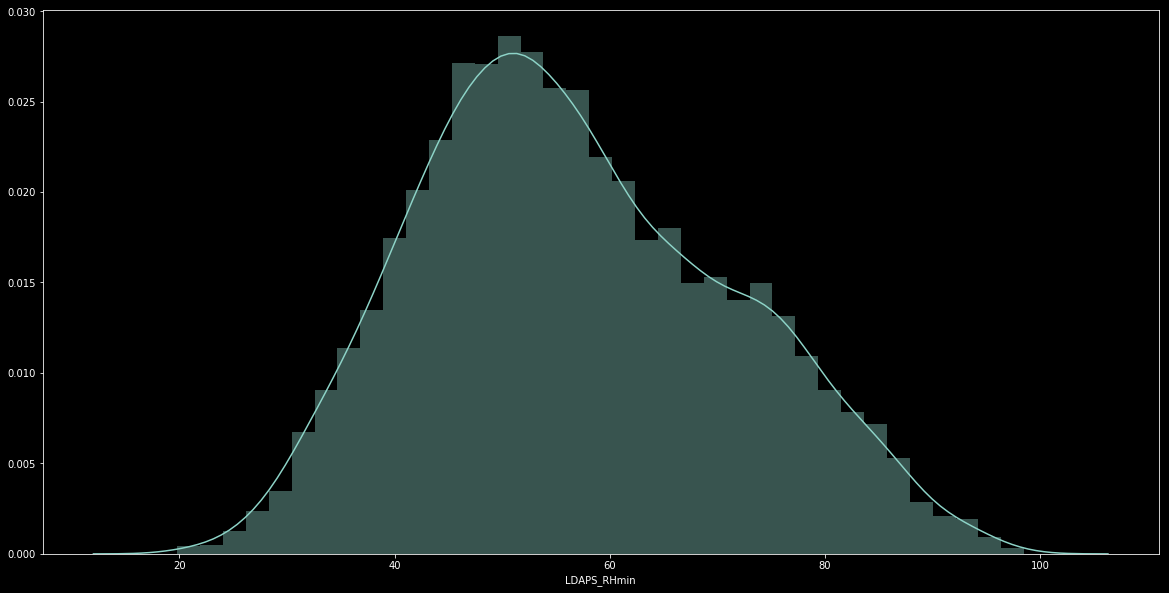

In [13]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_RHmin']))

AxesSubplot(0.125,0.125;0.775x0.755)


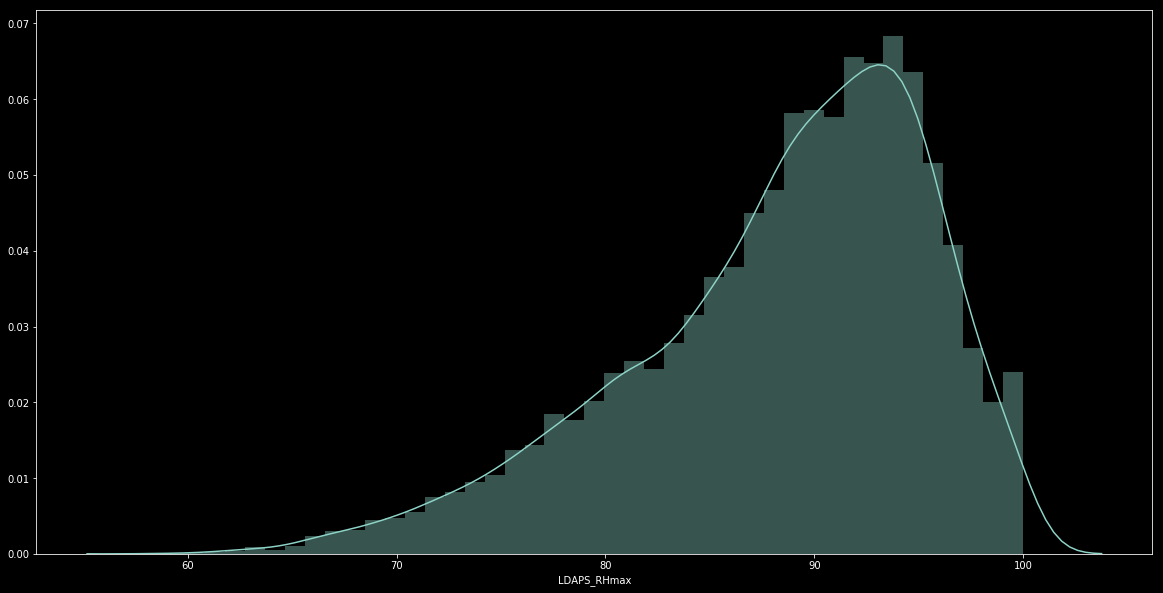

In [14]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_RHmax']))

AxesSubplot(0.125,0.125;0.775x0.755)


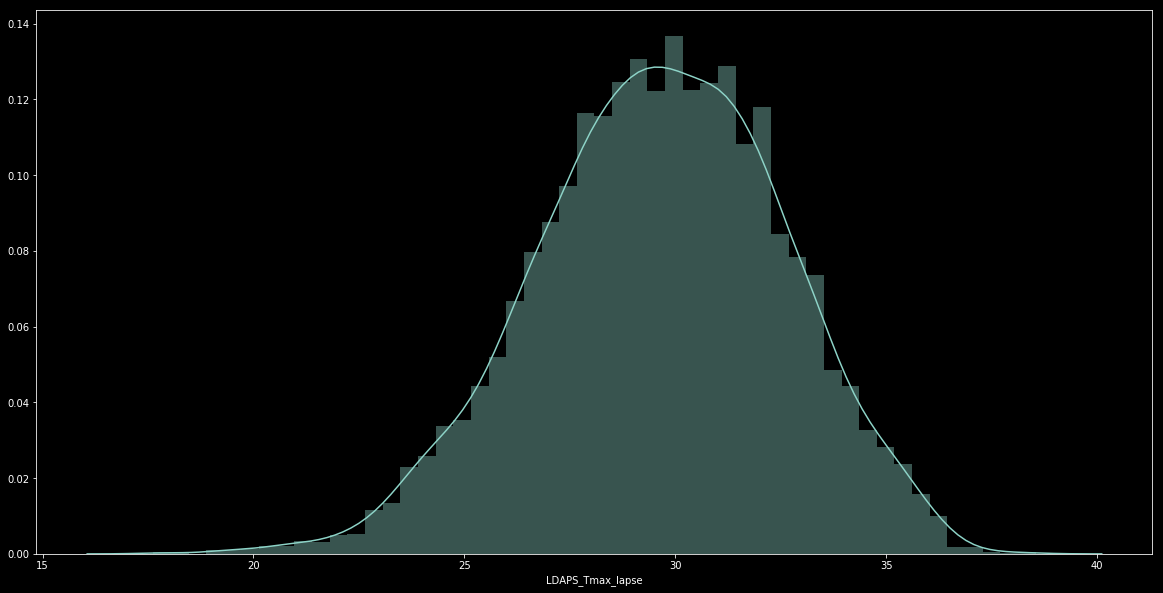

In [15]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_Tmax_lapse']))

AxesSubplot(0.125,0.125;0.775x0.755)


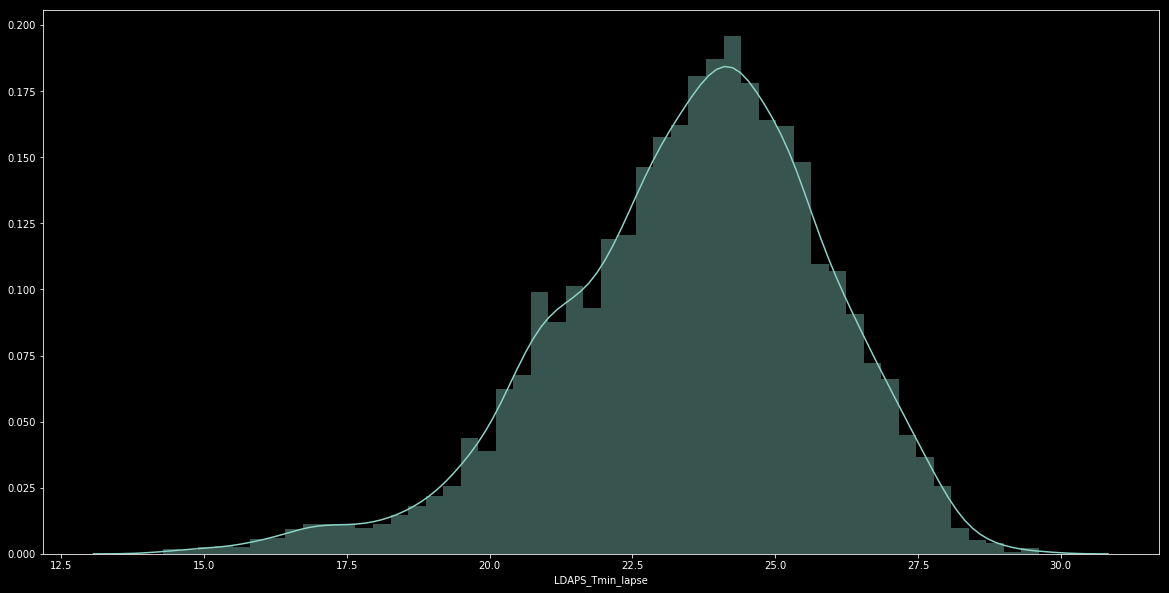

In [36]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_Tmin_lapse']))

AxesSubplot(0.125,0.125;0.775x0.755)


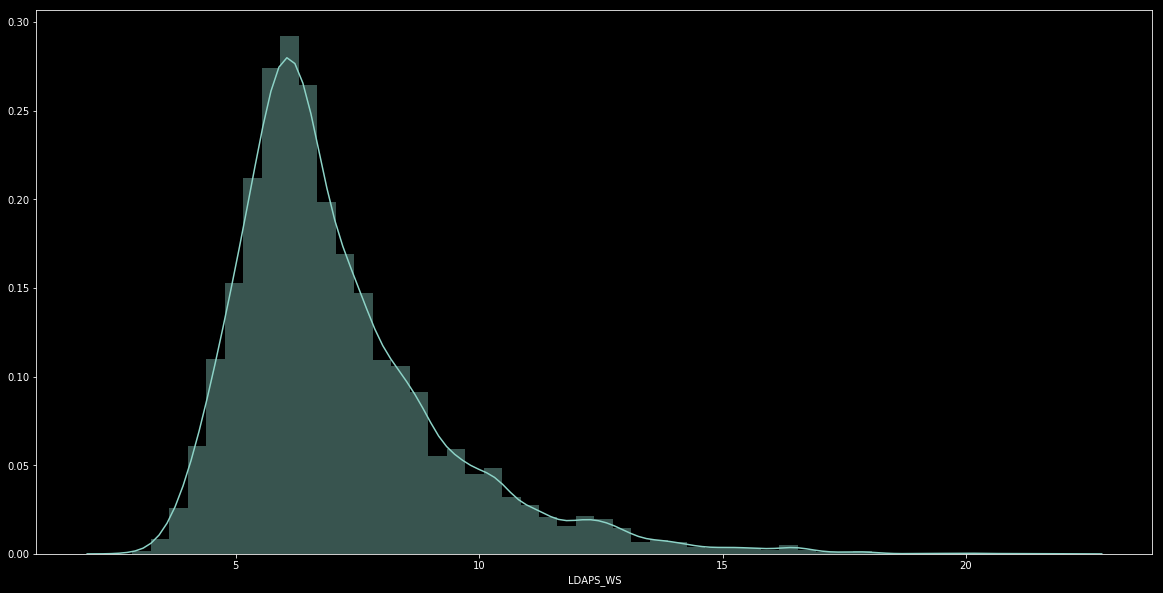

In [35]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_WS']))

AxesSubplot(0.125,0.125;0.775x0.755)


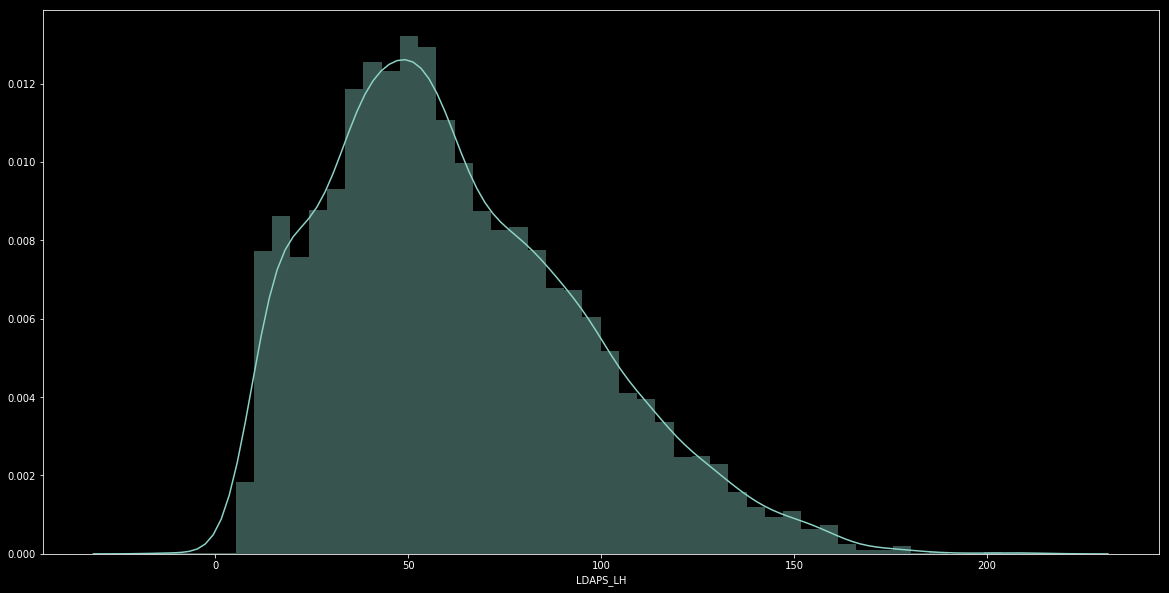

In [18]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_LH']))

AxesSubplot(0.125,0.125;0.775x0.755)


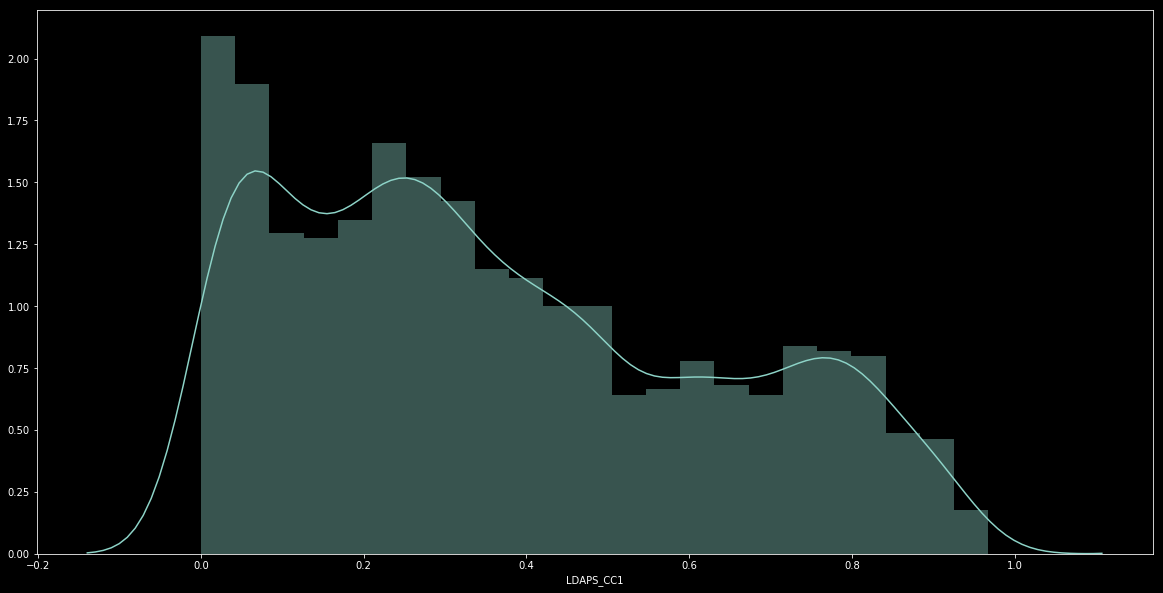

In [19]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_CC1']))

AxesSubplot(0.125,0.125;0.775x0.755)


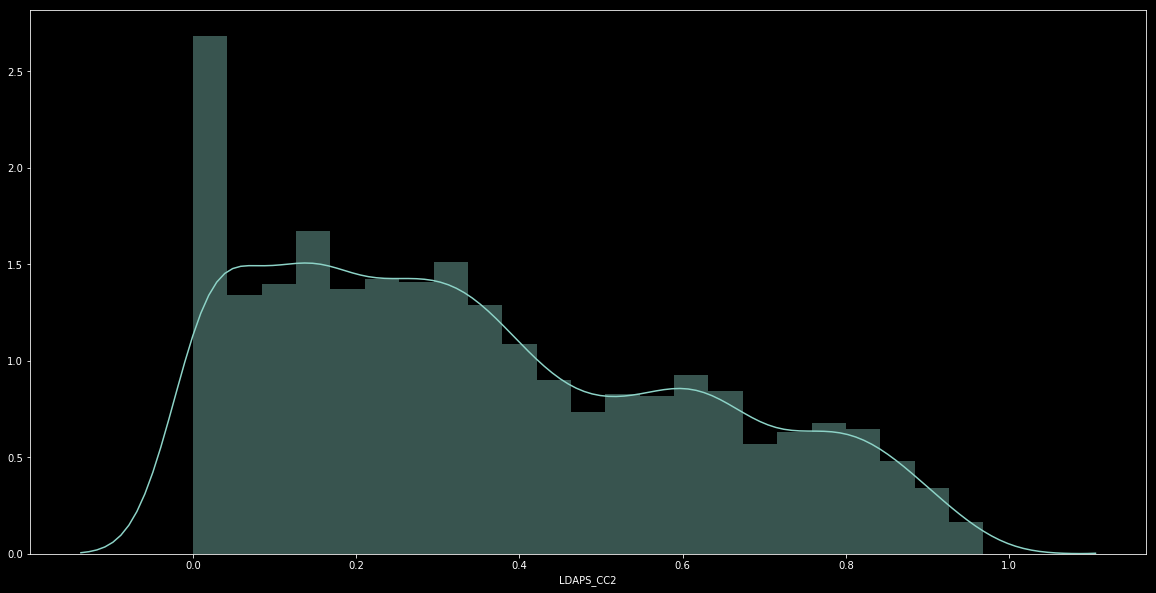

In [20]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_CC2']))

AxesSubplot(0.125,0.125;0.775x0.755)


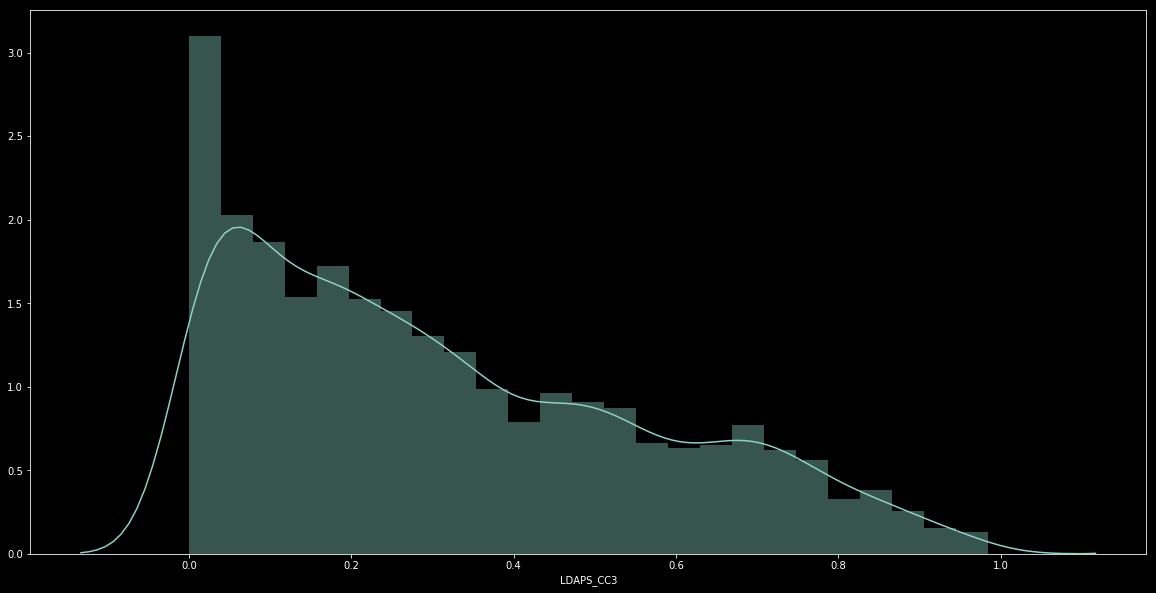

In [21]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_CC3']))

AxesSubplot(0.125,0.125;0.775x0.755)


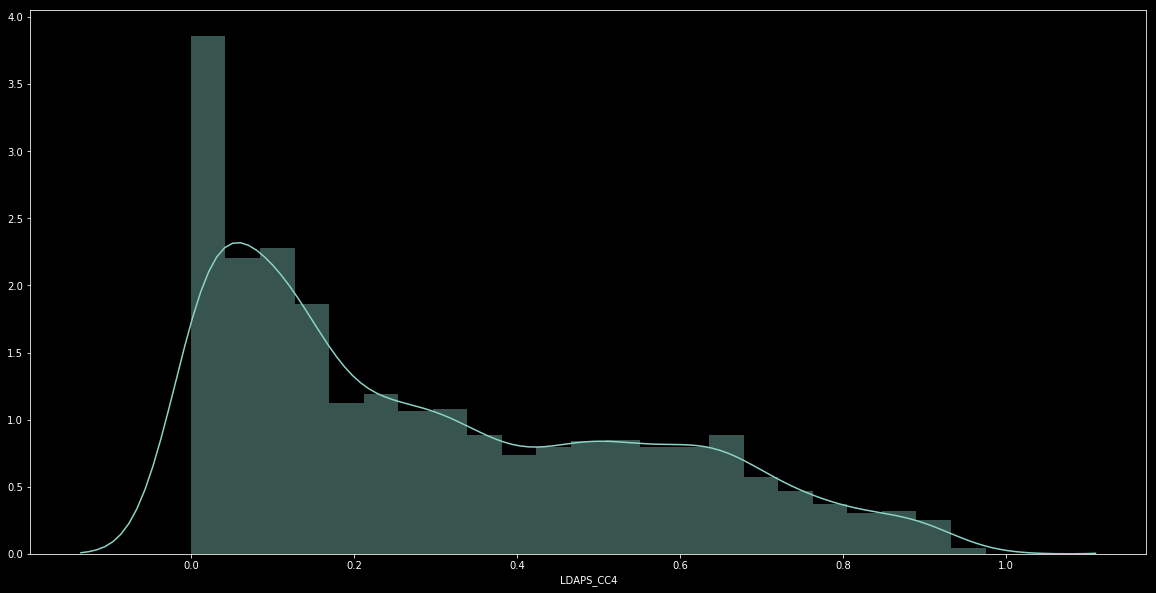

In [22]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_CC4']))

AxesSubplot(0.125,0.125;0.775x0.755)


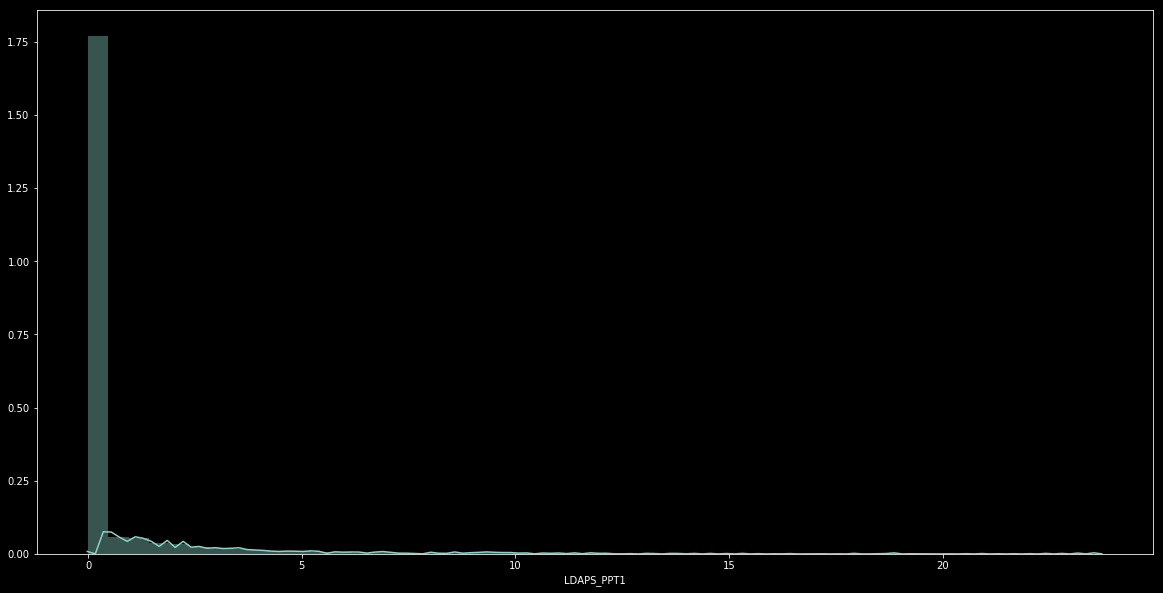

In [38]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_PPT1']))

AxesSubplot(0.125,0.125;0.775x0.755)


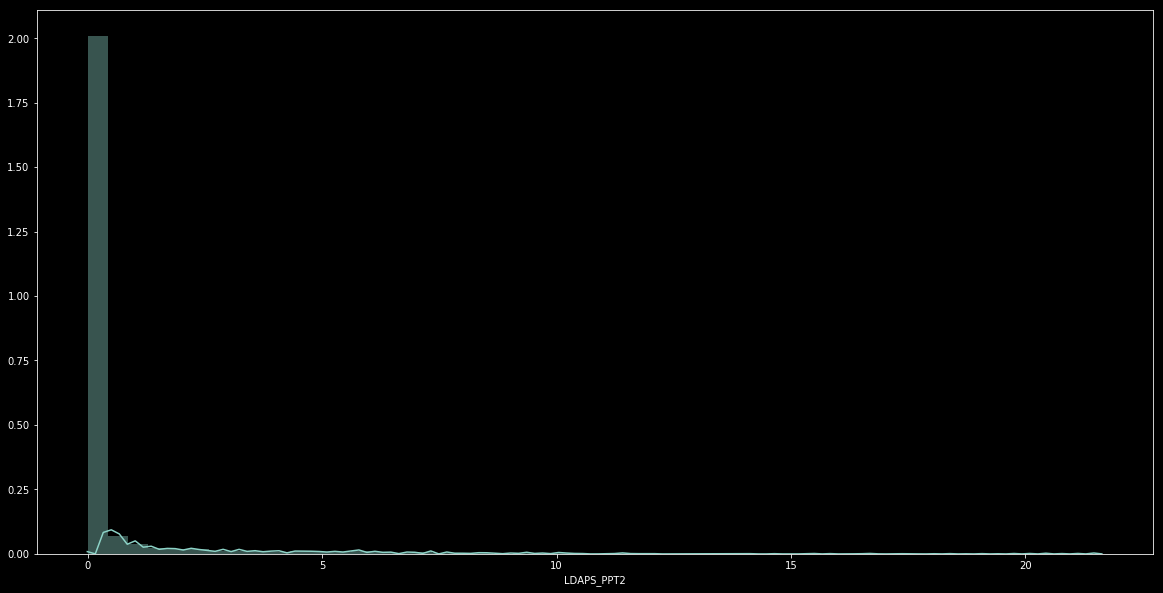

In [24]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_PPT2']))

AxesSubplot(0.125,0.125;0.775x0.755)


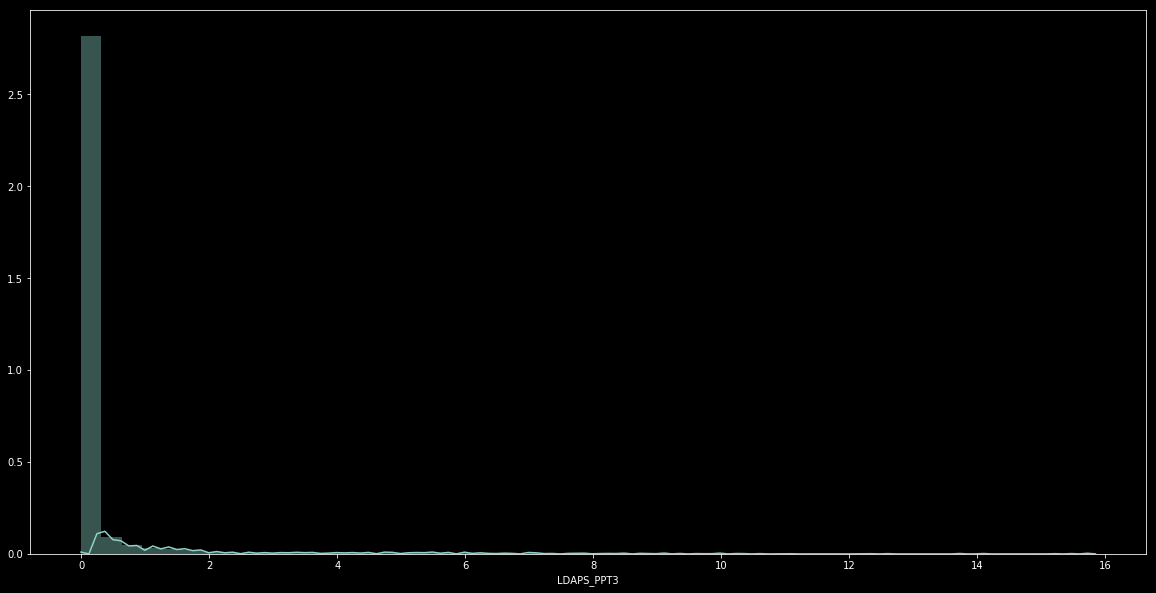

In [25]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_PPT3']))

AxesSubplot(0.125,0.125;0.775x0.755)


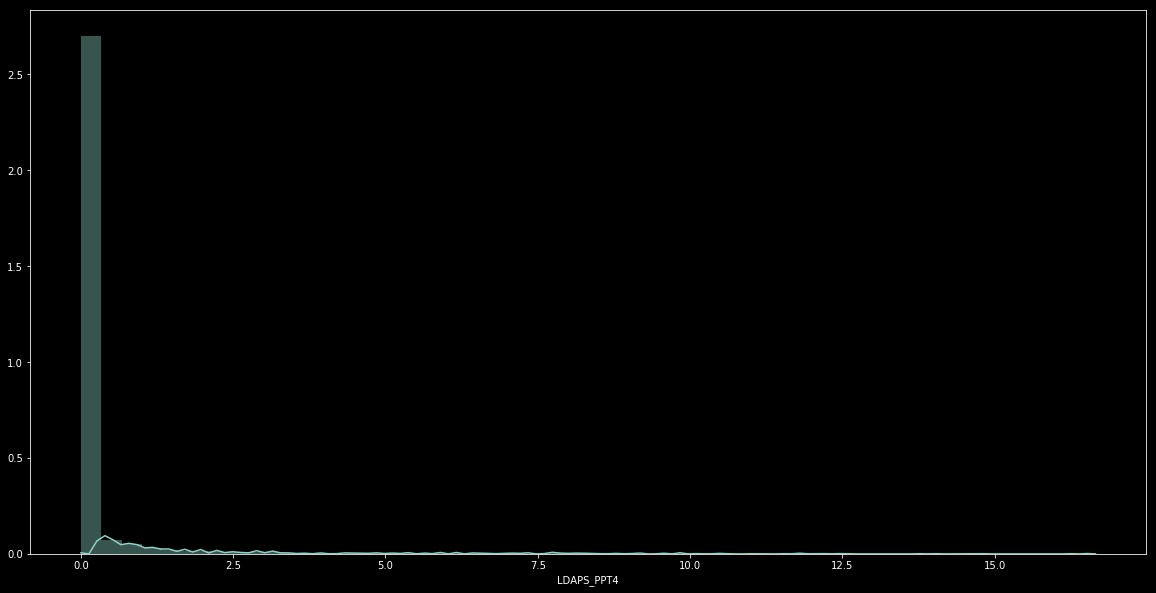

In [26]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['LDAPS_PPT4']))

AxesSubplot(0.125,0.125;0.775x0.755)


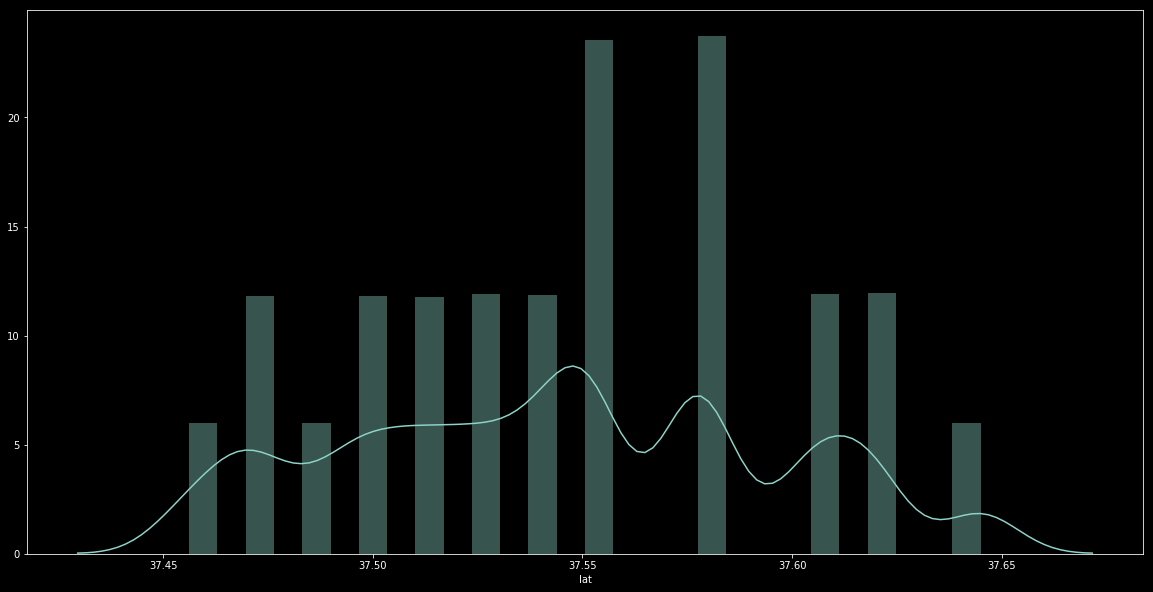

In [40]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['lat']))

AxesSubplot(0.125,0.125;0.775x0.755)


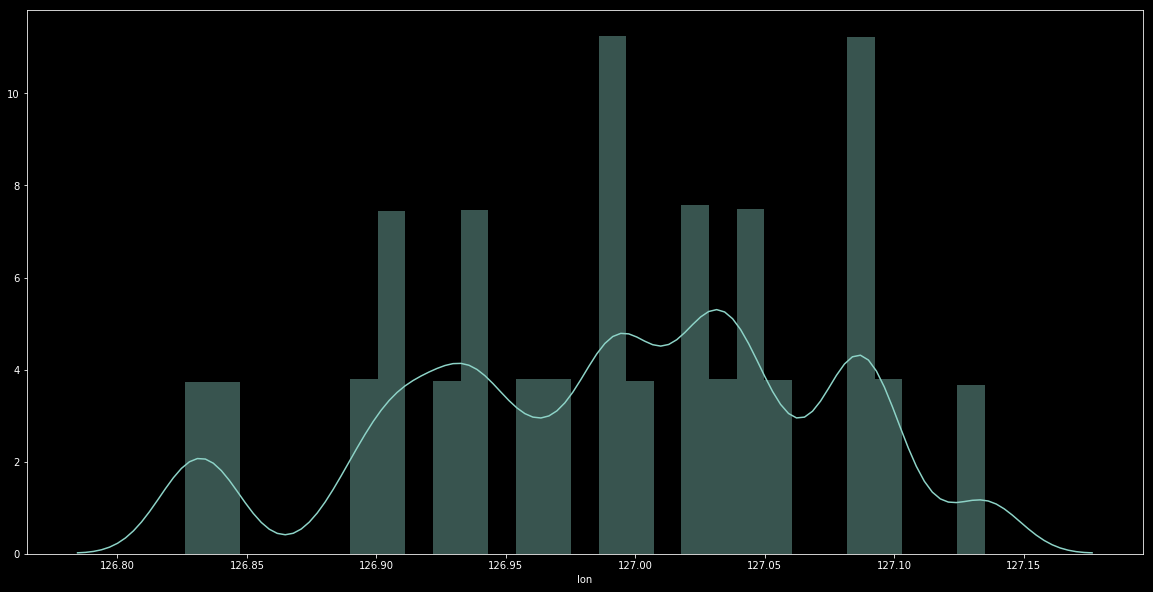

In [28]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['lon']))

AxesSubplot(0.125,0.125;0.775x0.755)


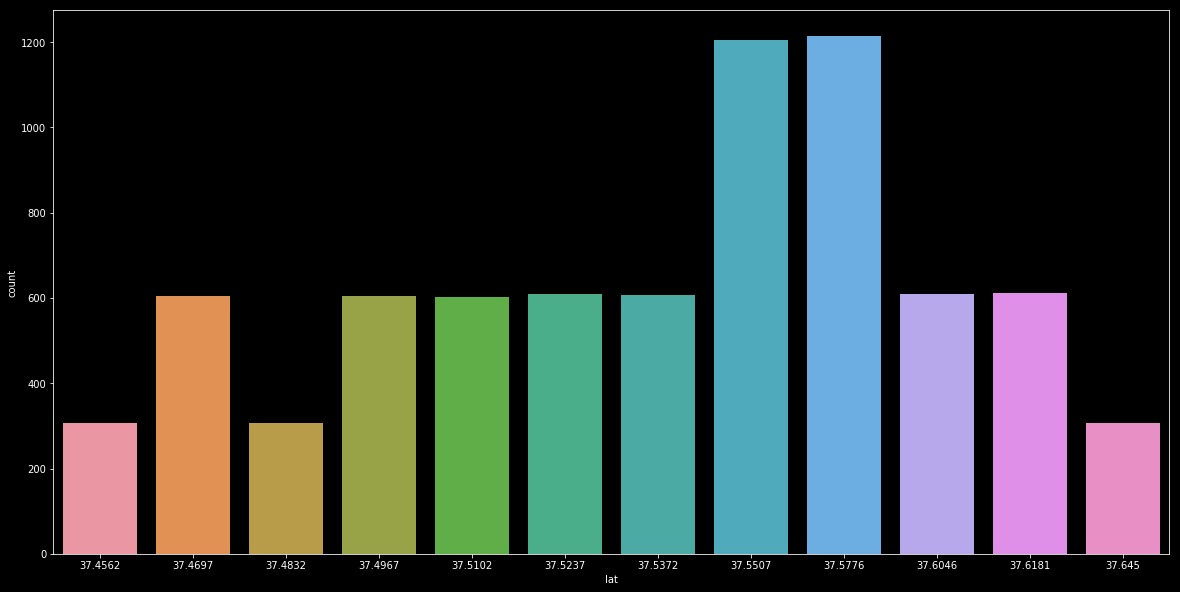

In [41]:
plt.figure(figsize=(20,10))
print(sns.countplot(df['lat']))

AxesSubplot(0.125,0.125;0.775x0.755)


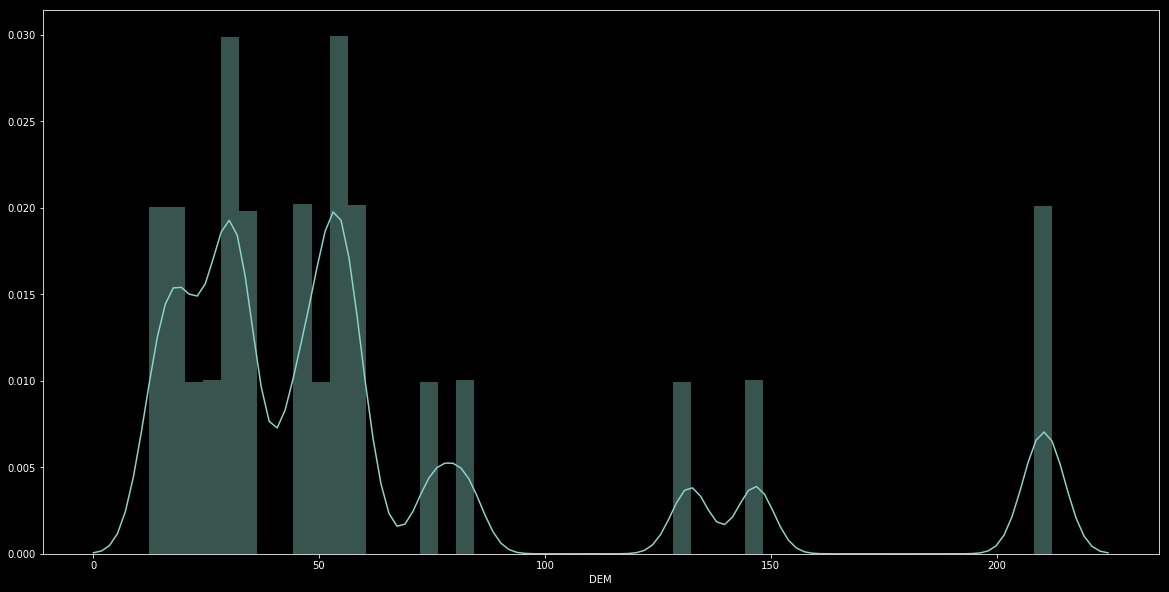

In [29]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['DEM']))

AxesSubplot(0.125,0.125;0.775x0.755)


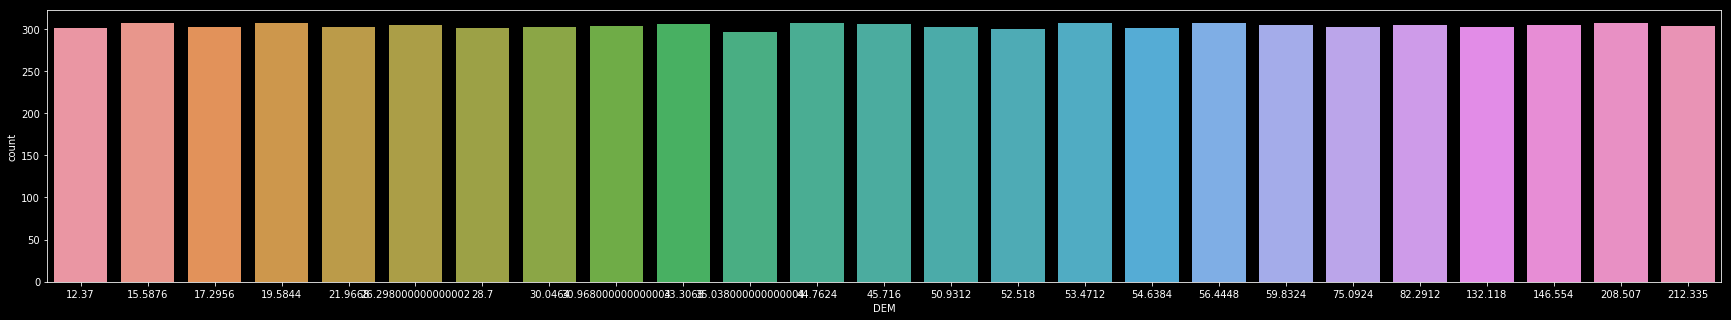

In [44]:
plt.figure(figsize=(30,5))
print(sns.countplot(df['DEM']))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


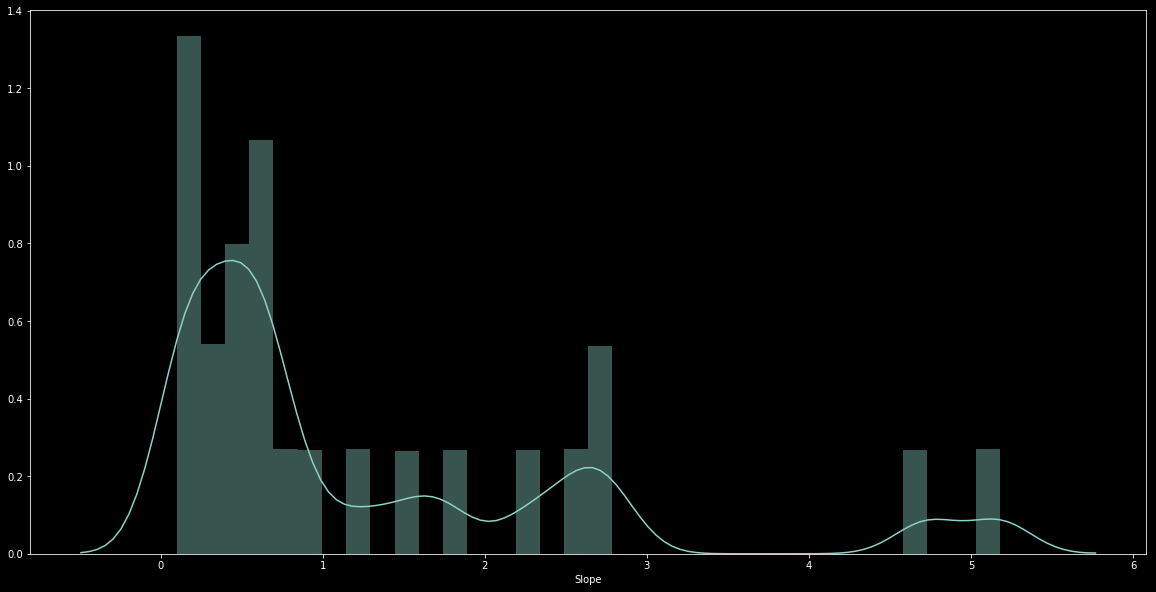

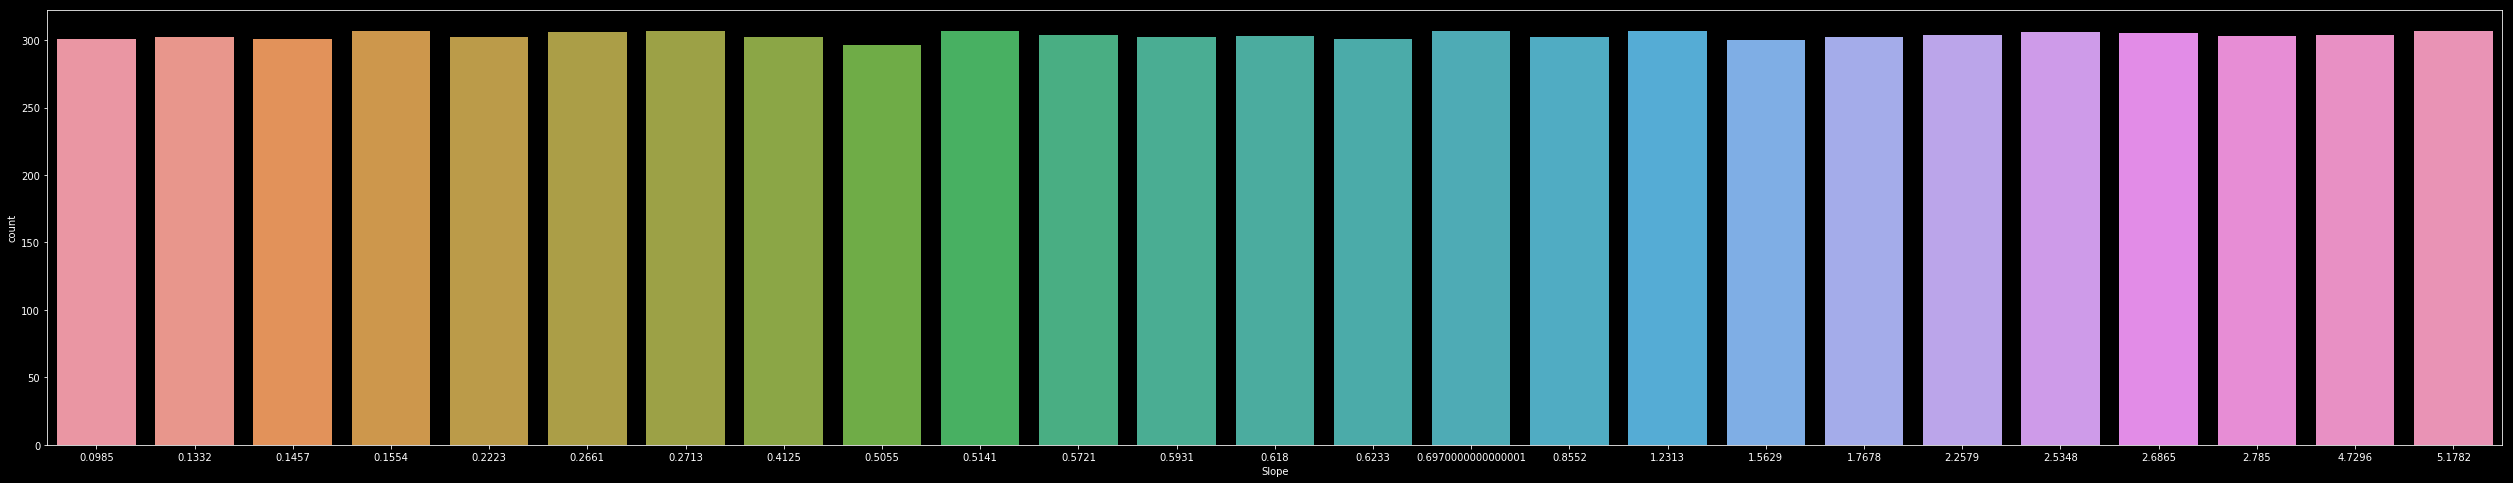

In [47]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['Slope']))
plt.figure(figsize=(44,8))
print(sns.countplot(df['Slope']))

AxesSubplot(0.125,0.125;0.775x0.755)


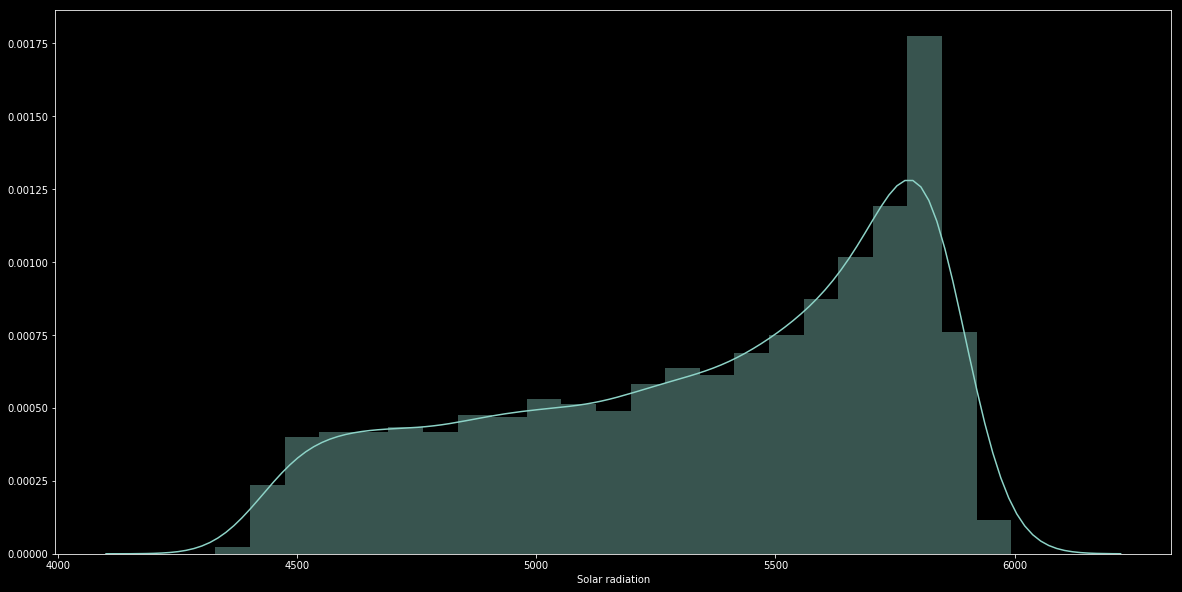

In [31]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['Solar radiation']))

AxesSubplot(0.125,0.125;0.775x0.755)


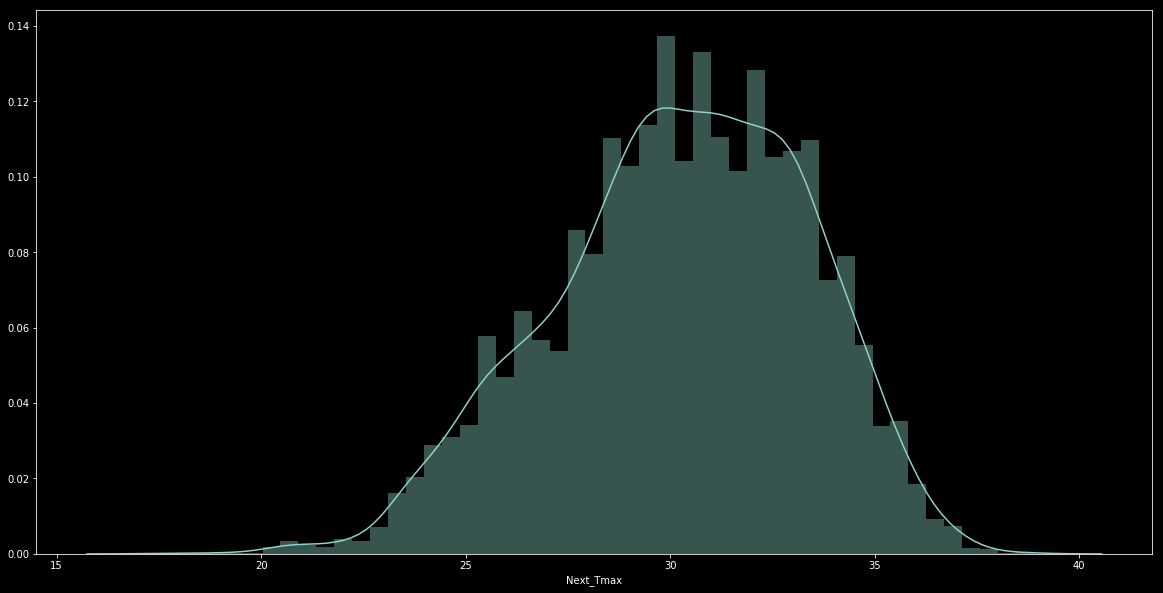

In [32]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['Next_Tmax']))

AxesSubplot(0.125,0.125;0.775x0.755)


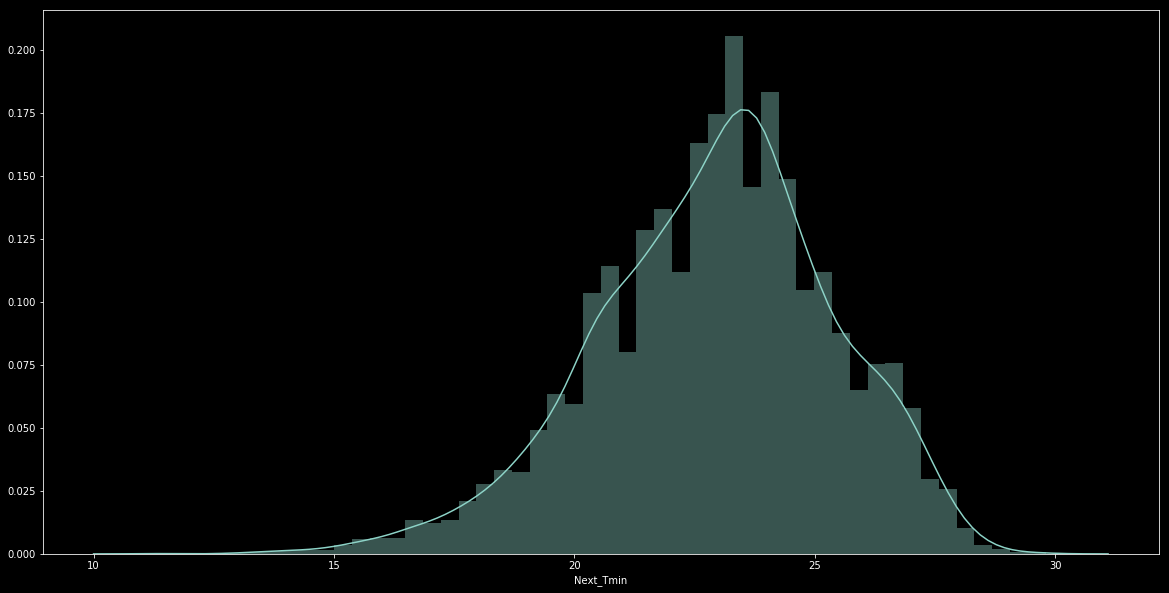

In [33]:
plt.figure(figsize=(20,10))
print(sns.distplot(df['Next_Tmin']))

<Figure size 2160x2160 with 0 Axes>

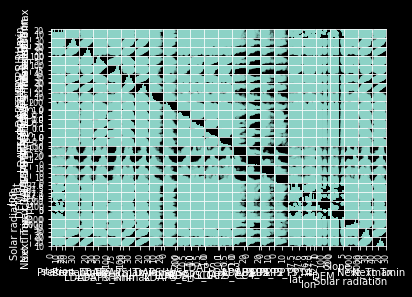

In [55]:
plt.figure(figsize=(30,30))
scatter_matrix(df)
plt.show()

In [111]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [56]:
import plotly.express as px

fig = px.scatter(df, x='Next_Tmax', y="Date")
fig.show()

In [59]:
fig = px.line(df, y='Next_Tmax', x="Date")
fig.show()

In [47]:
from sklearn.preprocessing import LabelEncoder

df1= list(df.select_dtypes(include=['float64']).columns)
label_encoder_feat = {}
for i, feature in enumerate(df1):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

print(df.head())
df.shape

      Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
4670            66            85         6236         5724              1580   
1774            88           102         2378         1898              7437   
5572           158           141         3272         1609              7055   
5028            80           104         7532         7533                84   
1685            93            90          321         2960              4736   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
4670              3029      5403      3278       5079       7361  ...   
1774              6286      2507      3995       5602       4498  ...   
5572              6982      2248      6642        906        245  ...   
5028               279      7436      2653       6412       6767  ...   
1685              3596      1969      4974       6396       6185  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  lat  lon  DEM  Slope  \
4670        10

(7588, 23)

In [48]:
from sklearn.utils import shuffle
df = shuffle(df)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df.drop(columns = ['Next_Tmin', 'Next_Tmax'])
target = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.2,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (6070, 21)
Test data set size :  (1518, 21)


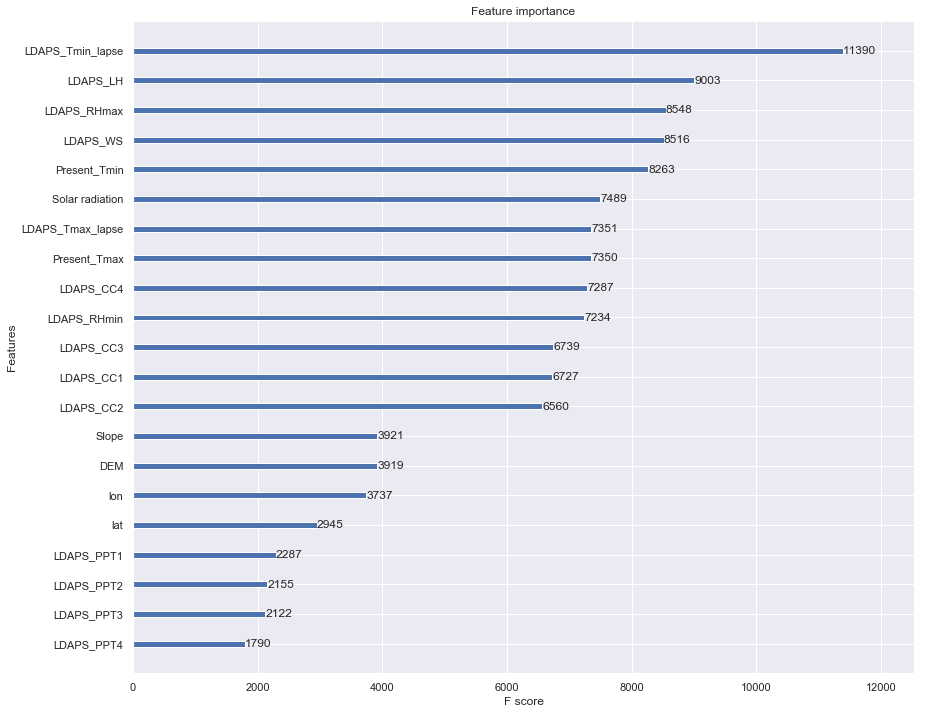

In [49]:

from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

In [50]:

# Predictions
pred = model_importance.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(y_test, pred))
print ("The f1 score of model 3 : ", f1_score(y_test, pred, average = None))

The accuracy of model 3 :  0.052700922266139656
The f1 score of model 3 :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.28571429
 0.         0.         0.         0.         0.         0.
 0.         0.22222222 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.13333333 0.         0.13333333
 0.23529412 0.16       0.         0.06896552 0.13333333 0.11111111
 0.13636364 0.         0.04761905 0.         0.25641026 0.
 0.08695652 0.         0.05714286 0.05128205 0.         0.06666667
 0.         0.10526316 0.07272727 0.04081633 0.08333333 0.04444444
 0.         0.         0.11764706 0.         0.07843137 0.
 0.08695652 0.125      0.07692308 0.07017544 0.07843137 0.07692308
 0.14492754 0.09677419 0.05       0.03389831 0.0606

Train data set size :  (6070, 21)
Test data set size :  (1518, 21)
The accuracy of model 3 :  0.05138339920948617
The f1 score of model 3 :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.25       0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.08333333 0.08333333 0.28571429 0.125      0.         0.1025641
 0.07142857 0.14285714 0.07407407 0.08695652 0.05714286 0.04081633
 0.05405405 0.         0.06060606 0.         0.24489796 0.12244898
 0.08510638 0.03571429 0.         0.         0.08       0.05
 0.         0.08333333 0.04081633 0.         0.         0.1
 0.0833

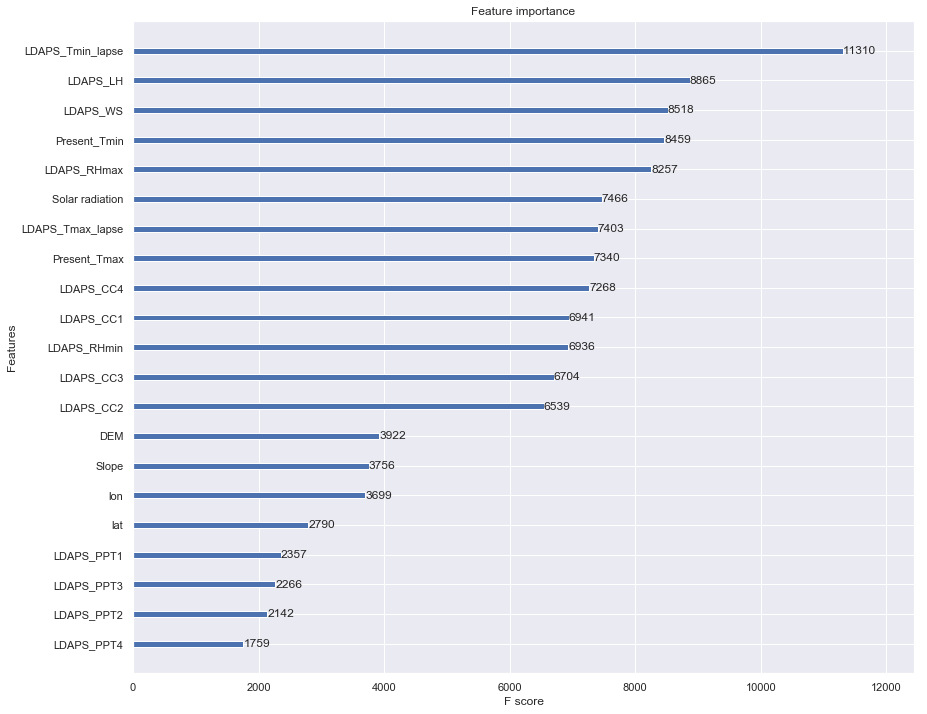

In [36]:
target = df['Next_Tmin']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.2,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance)
# Predictions
pred = model_importance.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(y_test, pred))
print ("The f1 score of model 3 : ", f1_score(y_test, pred, average = None))

# linear regressioon

In [40]:
x = df.iloc[:,0:22].values
y = df.iloc[:,22].values

In [41]:
ct = ColumnTransformer([("encoder",OneHotEncoder(categories = "auto"),[6])], remainder = "passthrough")
x = np.array(ct.fit_transform(x))

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 0) 


TypeError: Singleton array array(<7588x7609 sparse matrix of type '<class 'numpy.float64'>'
	with 144499 stored elements in Compressed Sparse Row format>,
      dtype=object) cannot be considered a valid collection.

In [52]:
sc_x = StandardScaler()
sc_y = StandardScaler()


In [57]:
x_train_scaled = sc_x.fit_transform(X_train)
x_test_scaled = sc_x.transform(X_test)
y_train_scaled = sc_y.fit(y_train)
y_train_scaled = sc_y.transform(y_train)
y_test_scaled = sc_y.transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 44. 120.  71. ...  69.  95.  60.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.